### Objective

Preserve the waterbodies (Lake, Aquifier, Water Spring, River) for efficient water supply management. To achieve this,it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

In [292]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime as dt

In [293]:
#Dowloading the data for Lake Bilancino 
lb= pd.read_csv('Lake_Bilancino.csv')
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [294]:
lb.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [295]:
#Checking the columns
lb.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [296]:
#Checking data of Lake Bilancino
lb.tail()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6
6602,30/06/2020,0.0,0.0,0.0,0.0,0.0,22.75,250.80,0.6


### Dataset features provided

The features provided are Rain fall, Temperature, Lake level, Flow Rate

Output expected Predicted Lake Level and Flow rate.

### Tentative Analysis approach

1) Plot unfiltered data to see trend->Check the Corelation->Use ML Models to predict flow & Level of lake -> fine tune the model to improve the accuracy.

2) Plot unfiltered data to see trend->Check the Corelation->Use features to build a mathematical model to predict flow & Level of lake -> fine tune the model to improve the accuracy

In [297]:
# Handling date data type
lb['Date']= pd.to_datetime(lb['Date'])
lb['Year']= lb['Date'].dt.year
lb['Month']=lb['Date'].dt.month
lb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6603 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6026 non-null   float64       
 2   Rainfall_Mangona      6026 non-null   float64       
 3   Rainfall_S_Agata      6026 non-null   float64       
 4   Rainfall_Cavallina    6026 non-null   float64       
 5   Rainfall_Le_Croci     6026 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6603 non-null   float64       
 8   Flow_Rate             6582 non-null   float64       
 9   Year                  6603 non-null   int64         
 10  Month                 6603 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 567.6 KB


In [298]:
lb.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month
0,2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,3
1,2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,4
2,2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,5
3,2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,6
4,2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31,2002,7


##### Lake level data grouping by year and months

In [299]:
Lake_level= lb.groupby(["Year", "Month"]).Lake_Level.mean().reset_index()
Lake_level.head()

,Year,Month,Lake_Level
0,2002,1,249.158333
1,2002,2,249.143333
2,2002,3,249.172857
3,2002,4,249.148571
4,2002,5,249.130000


##### plotting the lake level over the TS to see the variation over year

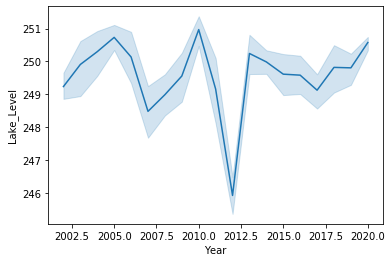

In [300]:
sns.lineplot(data=Lake_level, x="Year", y="Lake_Level")

Minimum Lake level according to the data was 244.52 in 2012 October

In [301]:
print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.min()])

     Year  Month  Lake_Level
129  2012     10  244.520645


Maximum Lake level reached according to historic data was 251.58 in March 2010

In [302]:

print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.max()])

    Year  Month  Lake_Level
98  2010      3  251.582258


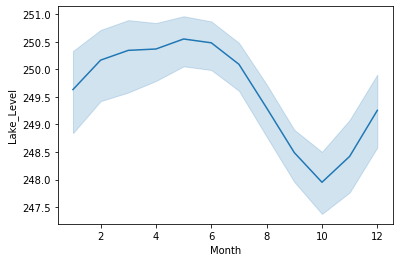

In [303]:
#plotting the lake level over the TS to see the variation over month
sns.lineplot(data=Lake_level, x="Month", y="Lake_Level")

#### Checking the flow rate over Months and Years

In [304]:
flow_rate= lb.groupby(["Year","Month"]).Flow_Rate.mean().reset_index()
flow_rate.head()

,Year,Month,Flow_Rate
0,2002,1,1.180000
1,2002,2,2.216667
2,2002,3,2.315714
3,2002,4,2.001429
4,2002,5,2.072857


In [ ]:
#Plotting the flow rate over the years (2002-2020)
sns.lineplot(data=flow_rate,x="Year",y= "Flow_Rate")

In [ ]:
#Plotting the flow rate over the Months accross the years (2002-2020)
sns.lineplot(data=flow_rate,x="Month",y= "Flow_Rate")

#####  Finding the Month and year with extreme flow rate data

In [ ]:
print(flow_rate[flow_rate.Flow_Rate==flow_rate.Flow_Rate.min()])

print(flow_rate[flow_rate.Flow_Rate==flow_rate.Flow_Rate.max()])


Flow rate was minimum during May-2012 and Maximum during March 2013

#### Rain fall and Temperature Variation over Month & year

In [ ]:
# Rain ditribution over the year
rain_yearly= lb.groupby(["Year"])[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
rain_yearly.head()

##### Plotting the rain pattern over the years

In [ ]:
plt.plot( 'Year', 'Rainfall_S_Piero', data=rain_yearly, marker='', color='blue', linewidth=2)
plt.plot( 'Year', 'Rainfall_Mangona', data=rain_yearly, marker='', color='red', linewidth=2)
plt.plot( 'Year', 'Rainfall_S_Agata', data=rain_yearly, marker='', color='yellow', linewidth=2)
plt.plot( 'Year', 'Rainfall_Cavallina', data=rain_yearly, marker='', color='black', linewidth=2)
plt.plot( 'Year', 'Rainfall_Le_Croci', data=rain_yearly, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

In [ ]:
#Rain distribution over the Months
rain_monthly= lb.groupby(["Month"])[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
rain_monthly.head()

In [ ]:
plt.plot( 'Month', 'Rainfall_S_Piero', data=rain_monthly, marker='', color='blue', linewidth=2)
plt.plot( 'Month', 'Rainfall_Mangona', data=rain_monthly, marker='', color='red', linewidth=2)
plt.plot( 'Month', 'Rainfall_S_Agata', data=rain_monthly, marker='', color='yellow', linewidth=2)
plt.plot( 'Month', 'Rainfall_Cavallina', data=rain_monthly, marker='', color='black', linewidth=2)
plt.plot( 'Month', 'Rainfall_Le_Croci', data=rain_monthly, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

#### Observation about Rain data:

The above plot shows Mangona recieves the maximum rain and S_Piero recieves the minimum over the months in a year.
July to August period is the relatively dry period where there is consistent minimum rain.
September to February is the time when its raining to a decent level.

##### Analyzing Temperatrure data

In [ ]:
temperature=lb.groupby(["Year","Month"]).Temperature_Le_Croci.mean().reset_index()
temperature.head()

In [ ]:
# Plotting the temperature pattern over the Year and Months
temperature["Year"]=temperature["Year"].astype(str)
sns.lineplot(data=temperature, x="Month", y="Temperature_Le_Croci", hue="Year")

#### Obseravtion about Temperature data:
Temperature gradually increases from January and reches to peak during June to August and gradually decreases to minimum in January.

In [ ]:
#Counting the Null value in Rain fall columns
lb[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].isnull().sum()

In [ ]:
# Dropping the rows with missing Rainfall values from Le_Croci
lb1=lb.dropna(subset=["Rainfall_Le_Croci","Temperature_Le_Croci"])
lb1.info()

#### Data Preparation for Model building:

In [ ]:
lb1['Rainfall_mean']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean(axis = 1)
#lb1['Rainfall_mean']=lb1.apply(lambda row:(row.Rainfall_S_Piero+ row.Rainfall_Mangona+row.Rainfall_S_Agata+row.Rainfall_Cavallina+row.Rainfall_Le_Croci)/5,axis=1)
lb1['Rainfall_median']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].median(axis = 1)
lb1['Rainfall_min']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].min(axis = 1)
lb1['Rainfall_max']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].max(axis = 1)
lb1['Rainfall_net']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].sum(axis = 1)
lb1.head()

In [ ]:
lb1['day_of_the_year'] = lb1['Date'].dt.dayofyear

#### Heat map for checking the corelation between original & derived variables

In [ ]:
lb1.info()

In [ ]:
plt.figure(figsize=(40,40))
#corr= lb1.drop(['Date'], axis=1)
#sns.heatmap(corr, annot = True)

##### Checking the rainfall and lake level trend

In [ ]:
comp=lb1[lb1["Year"].isin([2018])]
comp1=comp[["Lake_Level","Rainfall_net","Month"]]
sns.lineplot(data=comp1, x="Rainfall_net", y="Lake_Level")

In [ ]:
plt.plot( 'Month','Lake_Level', data=comp1, marker='', color='blue', linewidth=2)
#plt.plot( 'Month','Rainfall_mean', data=comp1, marker='', color='red', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

##### Choosing the predictor and target variables for Supervised Machine learning model.

In [ ]:
X= lb1[["Year","Month","Temperature_Le_Croci","Rainfall_mean", "day_of_the_year","Rainfall_median","Rainfall_net"]]
X.head()

In [ ]:
X.info()

In [ ]:
y=lb1[["Lake_Level"]]
y.head()

In [ ]:
y.info()

##### Linear regression for Modeling

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
train = lb1[~lb1['Year'].isin([2017,2018,2019,2020])]
test = lb1[lb1['Year'].isin([2018])]

X_train = train[["Year","Month","Temperature_Le_Croci","Rainfall_mean","Rainfall_net","day_of_the_year"]]
y_train = train[["Lake_Level"]]

X_test = test[["Year","Month","Temperature_Le_Croci","Rainfall_mean", "Rainfall_net","day_of_the_year"]]
y_test = test[["Lake_Level"]]

In [ ]:
#X_train, X_test,y_train, y_test= train_test_split(X, y, train_size=0.8 , random_state=100)
lr= LinearRegression(normalize=True)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred= lr.predict(X_test)

##### Model accuracy evaluation using r_squared method

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
r_squared

#### Random forest for Modeling for prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared